In [31]:
# Curve load

import numpy as np

ratings = [6.3,10,16,20,25,31.5,40,50,63,80,100,125,160,200]
curves = {}
for rating in ratings:
    curves_in = np.loadtxt(str(rating)+'.csv', delimiter=',')
    i = curves_in[:,0]
    t = curves_in[:,1]
    i1 = i/rating
    t1 = t
    curves_out = np.column_stack((i1,t1))
    curves[rating] = curves_out


In [41]:
# %matplotlib widget

# # Curve fitting

# import numpy as np
# from scipy.optimize import curve_fit, fsolve
# from scipy.interpolate import make_interp_spline
# from scipy.signal import savgol_filter
# import matplotlib.pyplot as plt

# for rating in ratings:
#     i1 = curves[rating][:,0]
#     t1 = curves[rating][:,1]
#     t2 = savgol_filter(i1, 5, 3)
#     curve_func_ = make_interp_spline(np.log10(i1), np.log10(t1))
#     curve_func = lambda x: 10**curve_func_(np.log10(x))
#     solve_func = lambda x: curve_func(x) - 1000
#     i_lim_0 = fsolve(solve_func, (1.5,))
#     solve_func = lambda x: curve_func(x) - 0.01
#     i_lim_1 = fsolve(solve_func, (5,))
#     plt.plot(rating*i1, t1, 'b-', label=('d'+str(rating)))
#     x = np.geomspace(i_lim_0, i_lim_1, num=100)
#     plt.plot(rating*x, curve_func(x), 'r-', label=str(rating))
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.grid()
#     plt.legend()

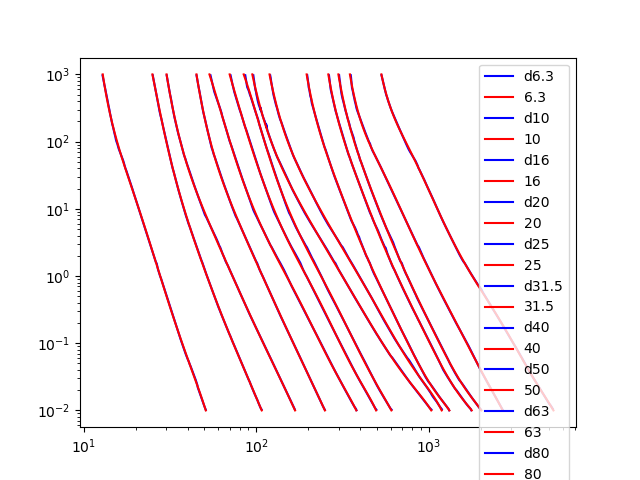

In [50]:
%matplotlib widget

# Curve fitting

import numpy as np
from scipy.optimize import curve_fit, fsolve
import matplotlib.pyplot as plt

def fit(i1, t1, order=8):
    
    def relay_curve(I, *ks):
        t = 0
        for order, k in enumerate(ks):
            t += k*np.log10(I)**order
        return t
    
    relay_curve_ = lambda I,*ks: 10**relay_curve(I, *ks)

    xdata = i1
    ydata = np.log10(t1)
    popt, pcov = curve_fit(relay_curve, xdata, ydata, p0=[1]*order)
    return relay_curve_, popt

fitted_curves = {}

for rating in ratings:
    i1 = curves[rating][:,0]
    t1 = curves[rating][:,1]
    curve_func, popt = fit(i1, t1)
    solve_func = lambda x: curve_func(x, *popt) - 1000
    i_lim_0 = fsolve(solve_func, (2,))
    curve_func, popt = fit(i1, t1)
    solve_func = lambda x: curve_func(x, *popt) - 0.01
    i_lim_1 = fsolve(solve_func, (10,))
    plt.plot(rating*i1, t1, 'b-', label=('d'+str(rating)))
    x = np.geomspace(i_lim_0, i_lim_1, num=100)
    plt.plot(rating*x, curve_func(x, *popt), 'r-', label=str(rating))
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.legend()
    fitted_curves[rating] = [curve_func, popt, i_lim_0, i_lim_1]

In [5]:
# %matplotlib widget

# # Curve fitting

# import numpy as np
# from scipy.optimize import curve_fit, fsolve
# import matplotlib.pyplot as plt

# def fit(i1, t1, order=13):
    
#     def relay_curve(I, *ks):
#         t = 0
#         for order, k in enumerate(ks):
#             t += k/(np.log(I))**order
#         return t
    
#     relay_curve_ = lambda I,*ks: np.exp(relay_curve(I, *ks))

#     xdata = i1
#     ydata = np.log(t1)
#     popt, pcov = curve_fit(relay_curve, xdata, ydata, p0=[1]*order)
#     return relay_curve_, popt

# fitted_curves = {}

# for rating in ratings:
#     i1 = curves[rating][:,0]
#     t1 = curves[rating][:,1]
#     curve_func, popt = fit(i1, t1)
#     curve_func, popt = fit(i1, t1)
    
#     solve_func = lambda x: curve_func(x, *popt) - 2*3600
#     i_lim_0 = fsolve(solve_func, (1.5,))[0]
#     curve_func, popt = fit(i1, t1)
#     solve_func = lambda x: curve_func(x, *popt) - 0.01
#     i_lim_1 = fsolve(solve_func, (15,))[0]
    
#     plt.plot(rating*i1, t1, 'b-', label=('d'+str(rating)))
#     x = np.geomspace(i_lim_0, i_lim_1, num=100)
#     plt.plot(rating*x, curve_func(x, *popt), 'r-', label=str(rating))
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.grid()
#     plt.legend()
    
#     fitted_curves[rating] = [curve_func, popt, i_lim_0, i_lim_1]

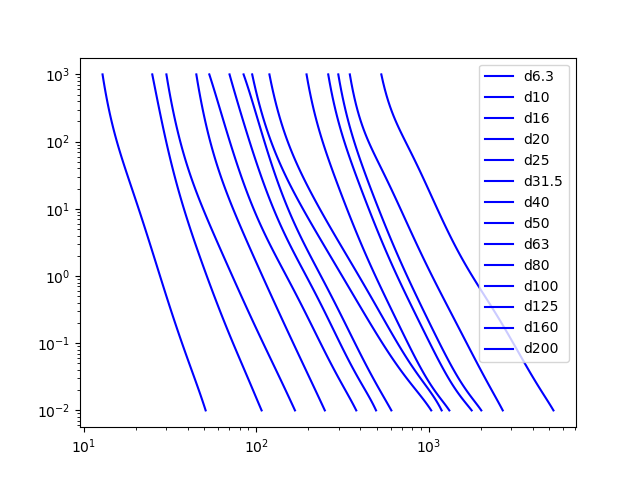

In [54]:
%matplotlib widget
# Curve fit

import numpy as np

tol = 0
toli = 0.1

for rating, [curve_func, popt, i_lim_0, i_lim_1] in fitted_curves.items():
    i = np.geomspace(i_lim_0, i_lim_1, num=100)
    t = curve_func(i, *popt)
    plt.plot(rating*i, t, 'b-', label=('d'+str(rating)))
    plt.xscale('log')
    plt.yscale('log')
    plt.grid()
    plt.legend()
    
    i1 = i*(1+toli)
    t1 = t*(1+tol)
    i2 = i*(1-toli)
    t2 = t*(1-tol)
    curves_out = np.column_stack((i1,t1,i2,t2))
    curves[rating] = curves_out
    np.savetxt('out/'+str(rating).replace('.','_')+'.csv', curves[rating], delimiter=',')


In [ ]:
i1.shape